### Dodatek nr 1
Zastosowanie XGBoost razem z grid search

In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

Wczytanie i zapoznanie się z danymi z pliku `breast_cancer.csv`

In [2]:
data = pd.read_csv("../data/breast_cancer.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Wybór cech i wyjścia

In [ ]:
data.loc[data['diagnosis']=='M', 'diagnosis']

In [7]:
y = data['diagnosis']
x = data.drop(['id', 'diagnosis'], axis=1)

Zestaw parametrów po których grid search ma pracować

In [9]:
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

In [19]:
gbm = xgb.XGBClassifier()

Definicja grid serach

In [44]:
from sklearn.model_selection import GridSearchCV

grid_mse = GridSearchCV(param_grid=gbm_param_grid, estimator=gbm,
                        scoring='accuracy',
                        cv=4, verbose=1)

Dopasowywanie

In [45]:
grid_mse.fit(x, y)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/tomek/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1243: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(['B', 'M'], dtype='<U1')

Najelpszy zestaw parametrów

In [22]:
grid_mse.best_params_

{'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 50}

Najmniejszy błąd RMSE

In [23]:
np.sqrt(np.abs(grid_mse.best_score_))

0.9867309467811763

In [24]:
np.abs(grid_mse.best_score_)

0.9736379613356766

In [25]:
bestEst = grid_mse.best_estimator_

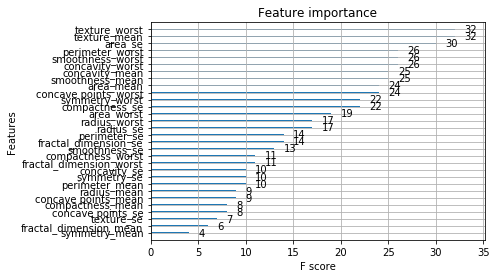

In [26]:
xgb.plot_importance(bestEst)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=123)

In [28]:
y_pred = bestEst.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[73,  0],
       [ 1, 40]])